In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [34]:
start='2013-01-01'
end='2023-11-15'

stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [35]:
data.reset_index(inplace=True)

In [36]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02,17.879629,17.972335,17.713997,17.784949,102033017
1,2013-01-03,17.890015,18.094212,17.817087,17.921163,93075567
2,2013-01-04,18.243526,18.330051,17.989146,18.030184,110954331
3,2013-01-07,18.163925,18.278383,18.060837,18.181229,66476239
4,2013-01-08,18.128077,18.202241,17.908799,18.183453,67295297
...,...,...,...,...,...,...
2732,2023-11-08,132.267960,132.545874,131.176157,131.374666,15093600
2733,2023-11-09,130.709671,132.962777,130.531003,132.367237,17976500
2734,2023-11-10,133.062012,133.270455,129.895757,130.550847,20872900


In [37]:
ma_100_days=data.Close.rolling(100).mean()

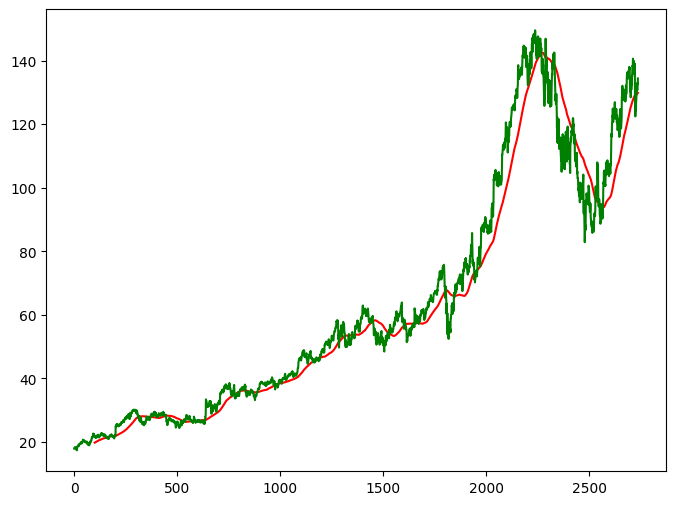

In [38]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [39]:
ma_200_days=data.Close.rolling(200).mean()

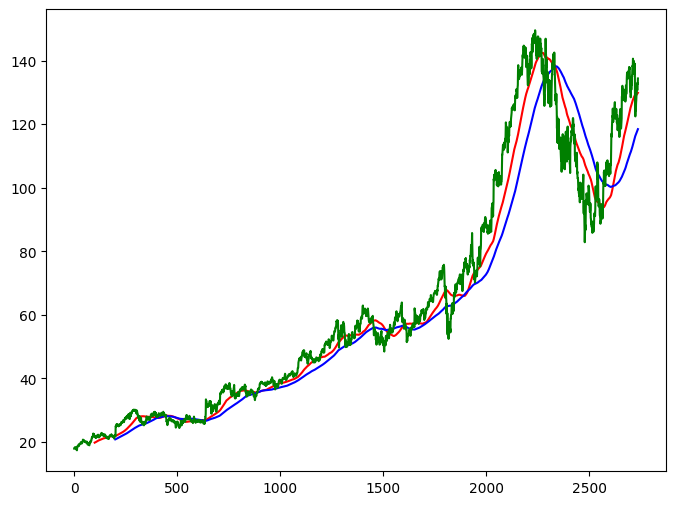

In [40]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [41]:
data.dropna(inplace=True)

In [42]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [43]:
data_train.shape[0]

2189

In [44]:
data_test.shape[0]

548

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale=scaler.fit_transform(data_train)

In [47]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [48]:
x,y=np.array(x),np.array(y)

In [49]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [50]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

d:\PROJECT\Stock Price Prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 0.0297
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0040
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0038
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0034
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0035
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0028
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0028
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0025
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0023
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0028
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0025
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0024
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0023
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0020
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [54]:
pas_100_days=data_train.tail(100)

In [55]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [56]:
data_test_scale=scaler.fit_transform(data_test)

In [57]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [58]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


In [59]:
scale=1/scaler.scale_

In [60]:
y_predict=y_predict*scale

In [61]:
y=y*scale

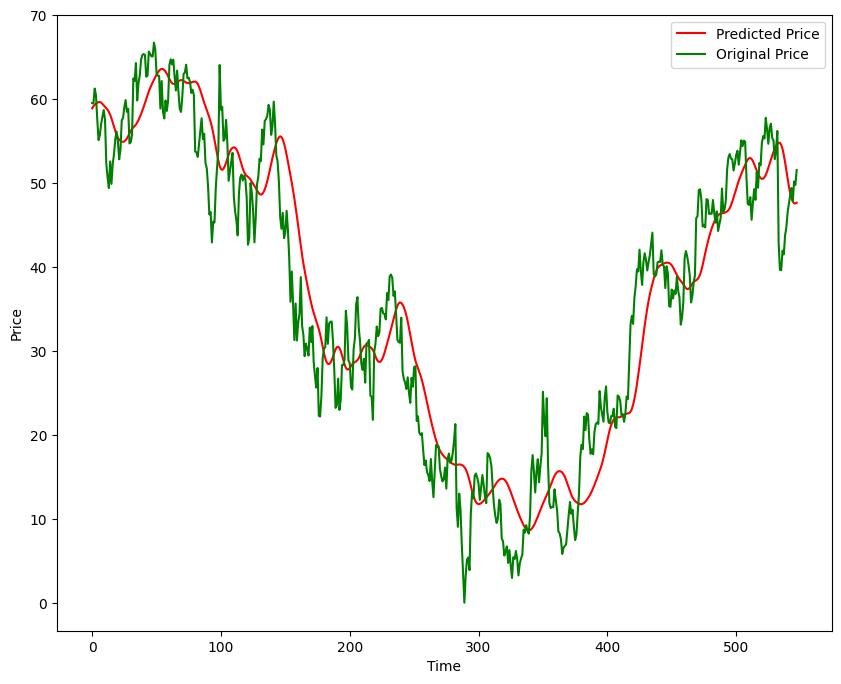

In [62]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [63]:
model.save('STOCK.keras')